In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [22]:
%matplotlib inline

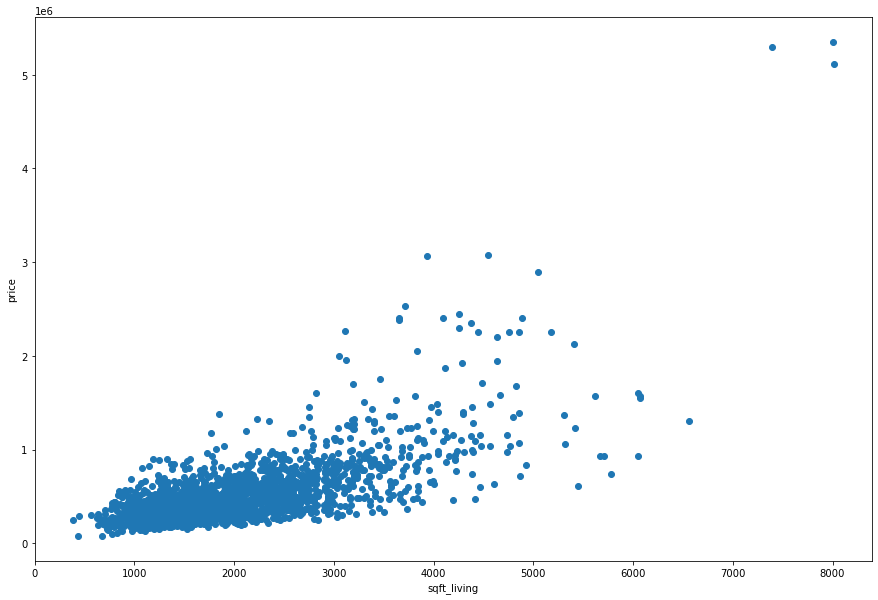

In [23]:
X = house_df.sqft_living.values.reshape(-1)
Y = house_df.price.values.reshape(-1)

plt.rcParams["figure.figsize"] = 15, 10
plt.scatter(X.reshape(-1, 1)[:2000], Y[:2000])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [24]:
#a)

x = X.reshape((-1, 1))[:1000]
y = Y[:1000]

#Your code:
model = LinearRegression() 
model.fit(x, y)
model.coef_

#Hint: .fit()
# y = x*model.coef_ + error.

array([269.46205468])

Mean squared error 57947526161.28837
R2 score (Coefficient of determination): 0.49670880166311393
Independent term: -32304.654721027997
Coefficient: [269.46205468]


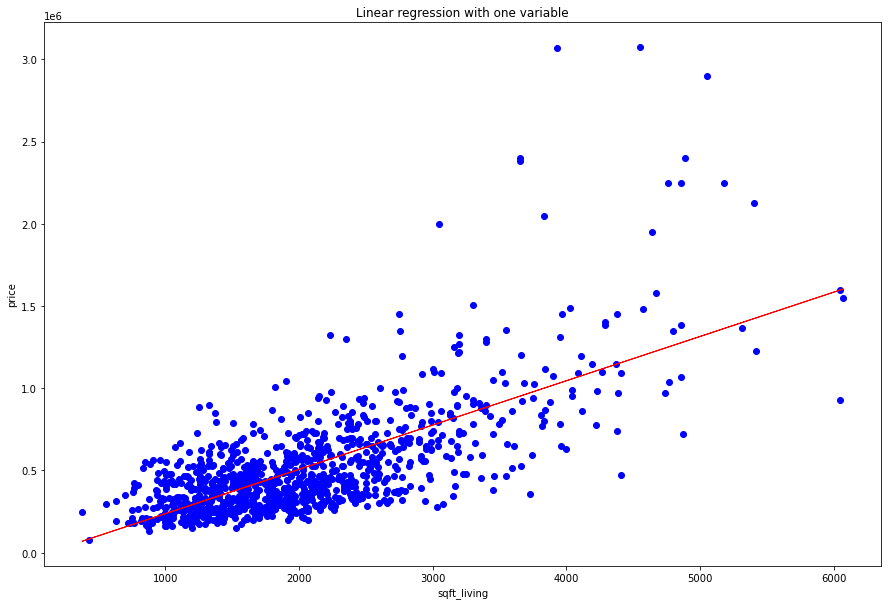

In [25]:
#b)

#Your code:
y_pred = model.predict(x)
print(f"Mean squared error {mean_squared_error(y_pred, y)}")
print(f"R2 score (Coefficient of determination): {model.score(x, y)}")

#R2 -> (1-u/v), where u = np.sum((y_true - y_pred) ** 2)
#                     v = np.sum(y_true - y_true.mean())**2)  y_pred = y_true.mean() => R2 = 0.0

print(f"Independent term: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=1)

plt.title('Linear regression with one variable')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

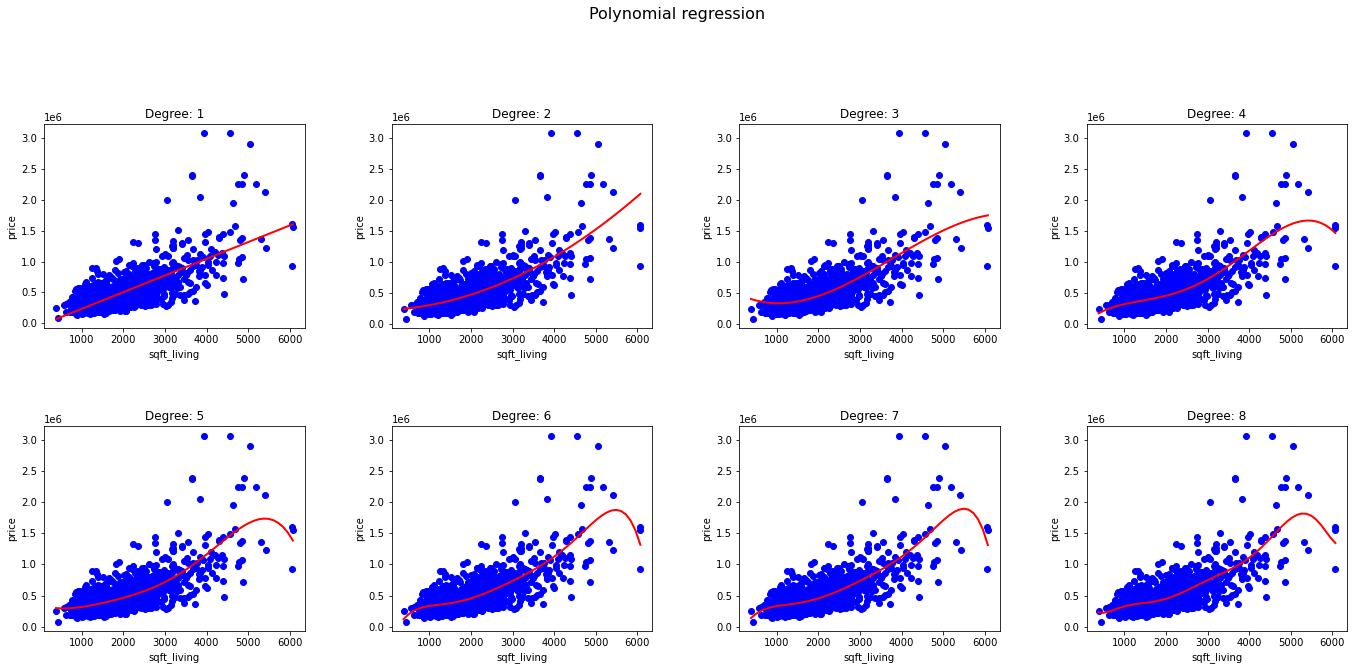

In [26]:
#c)
model = LinearRegression() 
fig, axs = plt.subplots(2, 4)
fig.set_figheight(10)
fig.set_figwidth(20)
mean_errs = []
for degree in range(1,9):
    
    poly = PolynomialFeatures(degree, include_bias = False)
    x_poly = poly.fit_transform(x)
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    
    df = pd.DataFrame({
        'x': np.squeeze(x),
        'y': np.squeeze(y_pred)
    })
        
    df = df.sort_values(by='x')
    axs[(degree-1)//4, (degree-1) %4].set_title(f'Degree: {degree}')
    axs[(degree-1)//4, (degree-1) %4].set_xlabel('sqft_living')
    axs[(degree-1)//4, (degree-1) %4].set_ylabel('price')
    axs[(degree-1)//4, (degree-1) %4].scatter(x, y,  color='blue')
    # axs[(degree-1)//4, (degree-1) %4].plot(df['x'], df['y'], color='red', linewidth=2)
    
    coefficients = np.polyfit(np.squeeze(x), np.squeeze(y), degree)
    poly_plot = np.poly1d(coefficients)
    x_new = np.linspace(x.min(), x.max())
    axs[(degree-1)//4, (degree-1) %4].plot(x_new, poly_plot(x_new), color='red', linewidth=2)
    mean_errs.append(mean_squared_error(y_pred, y))

fig.suptitle("Polynomial regression", fontsize=16)
fig.tight_layout(pad=5.0)


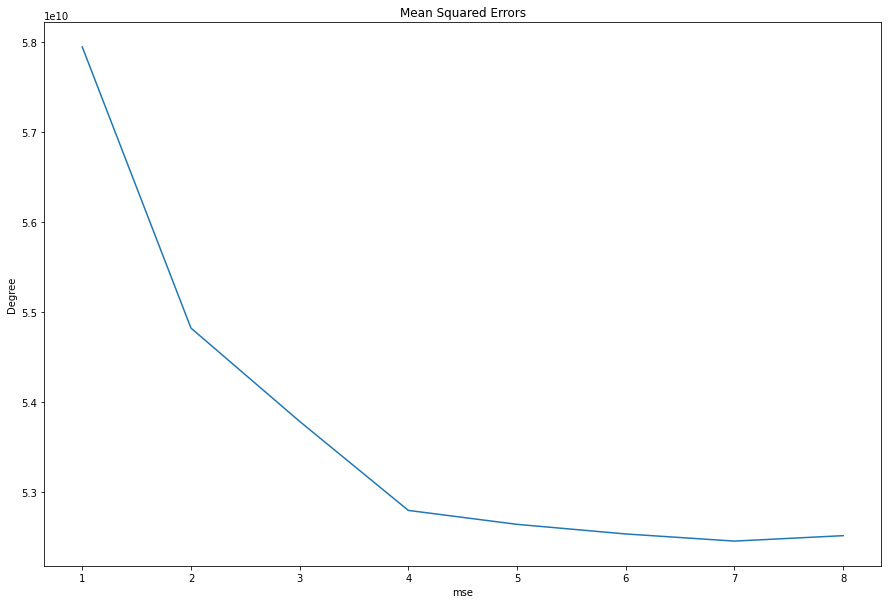

In [27]:
#Your code:
plt.title('Mean Squared Errors')
plt.ylabel('Degree')
plt.xlabel('mse')
plt.plot(range(1, 9), mean_errs)
plt.show()

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

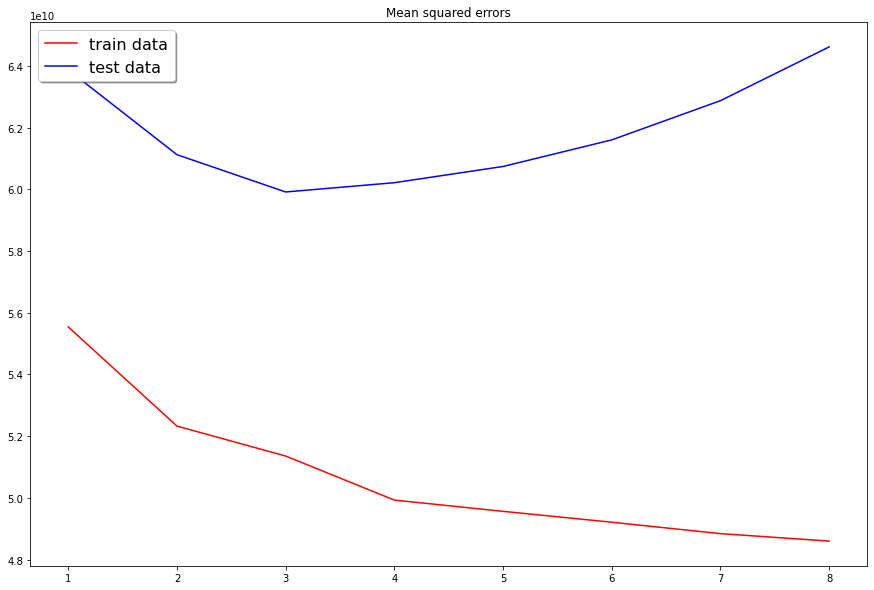

In [28]:
#a)
mean_errs_train = []
mean_errs_test = []
for degree in range(1, 9):
    poly = PolynomialFeatures(degree, include_bias = False)
    x_poly = poly.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=44)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    mean_errs_train.append(mean_squared_error(y_pred_train, y_train))
    mean_errs_test.append(mean_squared_error(y_pred_test, y_test))

plt.title("Mean squared errors")
plt.plot(range(1, 9), mean_errs_train, color='red', label='train data')
plt.plot(range(1, 9), mean_errs_test, color='blue', label='test data')
plt.legend(loc='upper left',
           fancybox=True, shadow=True, prop={'size': 16})

plt.show()

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

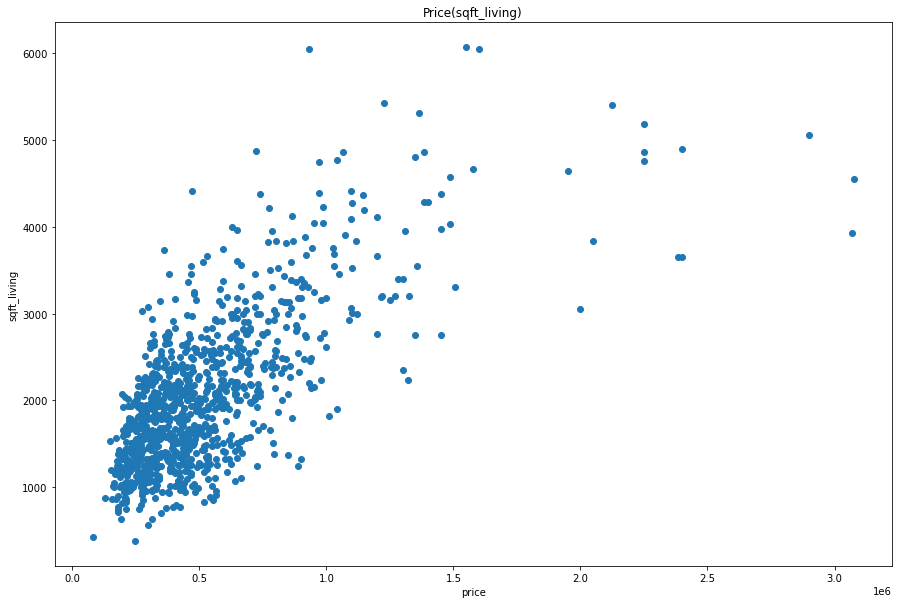

In [29]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
plt.title('Price(sqft_living)')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.scatter(X, y)
plt.show()

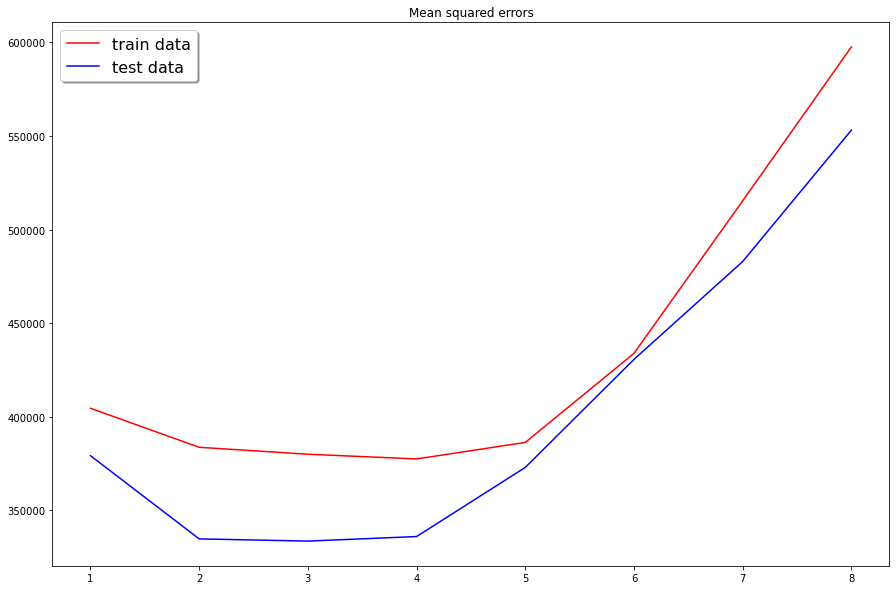

In [30]:
train_errs = []
test_errs = []
model = LinearRegression()
for degree in range(1, 9):
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=44)
    
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    train_errs.append(mean_squared_error(y_pred_train, y_train))
    test_errs.append(mean_squared_error(y_test, y_pred_test))

plt.title("Mean squared errors")
plt.plot(range(1, 9), train_errs, color='red', label='train data')
plt.plot(range(1, 9), test_errs, color='blue', label='test data')
plt.legend(loc='upper left',
           fancybox=True, shadow=True, prop={'size': 16})

plt.show()
    

In [31]:
# Model for an a)
poly = PolynomialFeatures(3)
x_poly = poly.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=44)
    
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
print('MSE: ', mean_squared_error(y_test, y_pred_test))


MSE:  333617.41905862564


In [52]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
from sklearn import linear_model
from sklearn.pipeline import Pipeline

X = house_df.drop(['waterfront', 'zipcode', 'yr_renovated','date', 'price', 'id', 'yr_built', 'bedrooms', 'view', 'floors', 'condition',
                  'sqft_lot15',], axis=1)

# X = house_df[['yr_built', 'grade', 'sqft_living', 'sqft_living15']]
X = X.values.reshape(-1,len(X.columns))
y = house_df.price.values.reshape(-1)
X = (X - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)


poly = PolynomialFeatures(3, include_bias=False)

ridge_model = Pipeline(steps=[
    ("poly", poly), 
    ("model", linear_model.Ridge(alpha=0.5))
])

_model = Pipeline(steps=[
    ("poly", poly), 
    ("model", LinearRegression())
])

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

_model.fit(X_train, y_train)
_y_pred = _model.predict(X_test)

print(f'Ridge Model score: {ridge_model.score(X_test, y_test)}')
print(f'Ridge MSE: {mean_squared_error(y_pred, y_test)}')

print(f'Model score: {_model.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(_y_pred, y_test)}')


Mean squared error equals: 48749581797.04599
Ridge Model score: 0.7593938533168927
Ridge MSE: 31810765653.983295
Model score: 0.7594023506661218
MSE: 31809642211.42484
